<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson-6:-Problem-Set-3:-Analyzing-Subway-Data" data-toc-modified-id="Lesson-6:-Problem-Set-3:-Analyzing-Subway-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson 6: Problem Set 3: Analyzing Subway Data</a></span><ul class="toc-item"><li><span><a href="#Lesson-6:-Quiz-1:-Exploratory-Data-Analysis" data-toc-modified-id="Lesson-6:-Quiz-1:-Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lesson 6: Quiz 1: Exploratory Data Analysis</a></span></li><li><span><a href="#Lesson-6:-Quiz-2:-Welch's-t-Test" data-toc-modified-id="Lesson-6:-Quiz-2:-Welch's-t-Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lesson 6: Quiz 2: Welch's t-Test</a></span></li><li><span><a href="#Lesson-6:-Quiz-3:-Mann-Whitney-U-Test" data-toc-modified-id="Lesson-6:-Quiz-3:-Mann-Whitney-U-Test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Lesson 6: Quiz 3: Mann-Whitney U-Test</a></span></li><li><span><a href="#Lesson-6:-Quiz-4:-Ridership-on-Rainy-vs-Nonrainy" data-toc-modified-id="Lesson-6:-Quiz-4:-Ridership-on-Rainy-vs-Nonrainy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Lesson 6: Quiz 4: Ridership on Rainy vs Nonrainy</a></span></li><li><span><a href="#Lesson-6:-Quiz-5:-Linear-Regression" data-toc-modified-id="Lesson-6:-Quiz-5:-Linear-Regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Lesson 6: Quiz 5: Linear Regression</a></span></li><li><span><a href="#Lesson-6:-Quiz-6:-Plotting-Residuals" data-toc-modified-id="Lesson-6:-Quiz-6:-Plotting-Residuals-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Lesson 6: Quiz 6: Plotting Residuals</a></span></li><li><span><a href="#Lesson-6:-Quiz-7:-Compute-$R^2$" data-toc-modified-id="Lesson-6:-Quiz-7:-Compute-$R^2$-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Lesson 6: Quiz 7: Compute $R^2$</a></span></li><li><span><a href="#Lesson-6:-Quiz-8:-More-Liner-Regression" data-toc-modified-id="Lesson-6:-Quiz-8:-More-Liner-Regression-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Lesson 6: Quiz 8: More Liner Regression</a></span><ul class="toc-item"><li><span><a href="#Another-examples" data-toc-modified-id="Another-examples-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Another examples</a></span></li></ul></li></ul></li></ul></div>

# Lesson 6: Problem Set 3: Analyzing Subway Data

## Lesson 6: Quiz 1: Exploratory Data Analysis

Data: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

In [1]:
# %%writefile lesson6_quiz1_exploratory_data_analysis.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    ent_rain = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain ==1] 
    ent_norain = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain ==0]
    
    
    # the histogram of the data
    plt.xlabel('ENTRIESn_hourly')
    plt.ylabel('Frequency')
    plt.title('Histogram of ENTRIESn_hourly')
    plt.axis([0, 6000, 0, 45000])
    plt.hist([ent_norain], bins = 180, color=['blue'], alpha=1, label = "No rain")
    plt.hist([ent_rain], bins = 180, color=['green'], alpha=1, label = "Rain")
    plt.legend()
    return plt

if __name__ == "__main__":
    filename = '../data/turnstile_data_master_with_weather.csv'
    df = pd.read_csv(filename, parse_dates = True)
    entries_histogram(df)

## Lesson 6: Quiz 2: Welch's t-Test

[x] Does entries data from the previous exercise seem normally
distributed ? NO

[x] Can we run Welch's T test on entries data Why or why not?
YES

## Lesson 6: Quiz 3: Mann-Whitney U-Test

In [2]:
# %%writefile lesson6_quiz3_mann_whitney_u_test.py
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe 
    containing our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney 
    U-test on the ENTRIESn_hourly column in the 
    turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing 
           the number of entries with rain and the 
           number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation,
    and you might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    rain = (turnstile_weather['rain']==1).values
    with_rain_mean = turnstile_weather['ENTRIESn_hourly'].loc[rain].mean()
    without_rain_mean = turnstile_weather['ENTRIESn_hourly'].loc[~rain].mean()
    U,p = scipy.stats.mannwhitneyu(turnstile_weather['ENTRIESn_hourly'].loc[rain], 
                                  turnstile_weather['ENTRIESn_hourly'].loc[~rain])
    
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader


In [3]:
import pandas as pd
filename = '../data/turnstile_data_master_with_weather.csv'
turnstile_weather = pd.read_csv(filename, parse_dates = True)

df = turnstile_weather[['rain','ENTRIESn_hourly']]
df.head()

,rain,ENTRIESn_hourly
0,0.0,0.0
1,0.0,217.0
2,0.0,890.0
3,0.0,2451.0
4,0.0,4400.0


In [4]:
rain = (turnstile_weather['rain']==1).values
df2 = df.loc[rain]
# df2 = turnstile_weather.loc[rain]
df2.head()

,rain,ENTRIESn_hourly
13337,1.0,1132.0
13338,1.0,164.0
13339,1.0,647.0
13340,1.0,6468.0
13341,1.0,4683.0


In [5]:
rain = (turnstile_weather['rain']==1).values
with_rain_mean = turnstile_weather['ENTRIESn_hourly'].loc[rain].mean()
with_rain_mean

1105.4463767458733

## Lesson 6: Quiz 4: Ridership on Rainy vs Nonrainy

Is the distribution of the number of entries statistically different between rainy non rainy days? YES

## Lesson 6: Quiz 5: Linear Regression

Data: https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv 

Your prediction should have a $R^2$ value of 0.40 or better.
You need to experiment using various input features contained in the dataframe. 
We recommend that you don't use the `EXITSn_hourly` feature as an input to the 
linear model because we cannot use it as a predictor: we cannot use exits 
counts as a way to predict entry counts.

In [6]:
# %%writefile lesson6_quiz5_linear_regression.py
import numpy as np
import pandas
from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    # your code here
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)
    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        # your code here
        cost_history.append( compute_cost(features, values, theta))
        theta += alpha/len(values)*np.dot(features.transpose(), values - np.dot(features,theta))
    return theta, pandas.Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )




/Users/poudel/miniconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/poudel/miniconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


[3379.34466358 3648.71075058 3918.07683757 ...  856.38536737  856.38536737
  856.38536737]


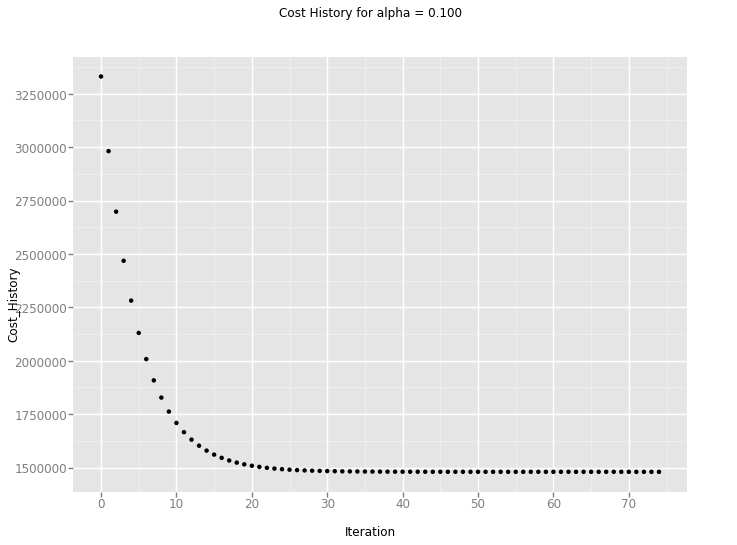

<ggplot: (277082572)>

In [7]:
filename = '../data/turnstile_data_master_with_weather.csv'
df = pd.read_csv(filename, parse_dates = True)
pred, plot = predictions(df)
print(pred)
plot

## Lesson 6: Quiz 6: Plotting Residuals

References: https://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm

In [8]:
# %%writefile lesson6_quiz6_plotting_residuals.py
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(bins=150)
    plt.suptitle('Residual histogram')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    # after looking plot
    plt.xlim(-2000,2000)
    return plt

<module 'matplotlib.pyplot' from '/Users/poudel/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

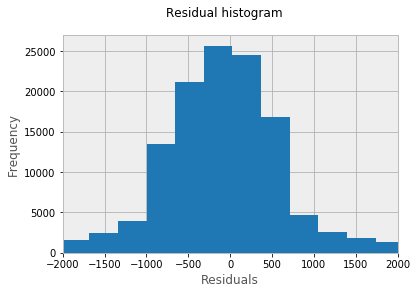

In [9]:
filename = '../data/turnstile_data_master_with_weather.csv'
df = pd.read_csv(filename, parse_dates = True)
pred, plot = predictions(df)
plot_residuals(df, pred)

## Lesson 6: Quiz 7: Compute $R^2$

Reference: https://onlinecourses.science.psu.edu/stat501/node/255/

$R^2$ value is the "Coefficient of Determination" for regression test.

$$
r^{2}=\frac{SSR}{SSTO}=1-\frac{SSE}{SSTO}
$$

![R-squared](r_sq.png)
![R-squared2](r_sq2.png)
![R-squared3](r_sq3.png)

In [10]:
# %%writefile lesson6_quiz7_compute_r_squared.py
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys

def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    
    # your code here
    y = data
    yhat = predictions
    ymean = np.mean(y)
    
    SSE = np.sum((y-yhat)**2)
    SSTO = np.sum((y-ymean)**2)
    
    r_squared = 1 - SSE/SSTO
    
    
    return r_squared

In [11]:
data = turnstile_weather['ENTRIESn_hourly'].values
r_squared = compute_r_squared(data, pred)
print(r_squared) # 0.4580443140393585

0.4580443140393585


## Lesson 6: Quiz 8: More Liner Regression

Data: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

References:


http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html

http://en.wikipedia.org/wiki/Ordinary_least_squares  
http://en.wikipedia.org/w/index.php?title=Linear_least_squares_(mathematics)  
http://en.wikipedia.org/wiki/Polynomial_regression

In [12]:
# %%writefile lesson6_quiz8_more_linear_regression.py
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm

"""
In this optional exercise, you should complete the function called 
predictions(turnstile_weather). This function takes in our pandas 
turnstile weather dataframe, and returns a set of predicted ridership values,
based on the other information in the dataframe.  

In exercise 3.5 we used Gradient Descent in order to compute the coefficients
theta used for the ridership prediction. Here you should attempt to implement 
another way of computing the coeffcients theta. You may also try using a reference implementation such as: 
http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html

One of the advantages of the statsmodels implementation is that it gives you
easy access to the values of the coefficients theta. This can help you infer relationships 
between variables in the dataset.

You may also experiment with polynomial terms as part of the input variables.  

The following links might be useful: 
http://en.wikipedia.org/wiki/Ordinary_least_squares
http://en.wikipedia.org/w/index.php?title=Linear_least_squares_(mathematics)
http://en.wikipedia.org/wiki/Polynomial_regression

This is your playground. Go wild!

How does your choice of linear regression compare to linear regression
with gradient descent computed in Exercise 3.5?

You can look at the information contained in the turnstile_weather dataframe below:
https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Note: due to the memory and CPU limitation of our amazon EC2 instance, we will
give you a random subset (~10%) of the data contained in turnstile_data_master_with_weather.csv

If you receive a "server has encountered an error" message, that means you are hitting 
the 30 second limit that's placed on running your program. See if you can optimize your code so it
runs faster.
"""

def predictions(weather_turnstile):
    #
    # Your implementation goes here. Feel free to write additional
    # helper functions
    # 
    # select the features to use
    feature_names = ['meantempi','Hour']
    
    # initialize Y
    X = sm.add_constant(weather_turnstile[feature_names])
    Y = weather_turnstile['ENTRIESn_hourly']
    
    # initialize the X features ==> add dummy units, standardize, and add constant
    dummy_units = pd.get_dummies(weather_turnstile['UNIT'], prefix='unit')
    X = weather_turnstile[feature_names].join(dummy_units)
    X = (X - X.mean()) / X.std()
    X = sm.add_constant(X)
    
    # ordinary least squares model
    model = sm.OLS(Y,X)
    
    # fit the model
    results = model.fit()
    #print results.summary()
    print ('R^2 = ', results.rsquared)
    
    # predict
    prediction = results.predict(X)
    
    return prediction


In [13]:
filename = '../data/turnstile_data_master_with_weather.csv'
weather_turnstile = pd.read_csv(filename, parse_dates = True)
pred = predictions(weather_turnstile)

R^2 =  0.4579801374932708


### Another examples

Ref: https://www.statsmodels.org/dev/example_formulas.html

In [14]:
import numpy as np
import pandas
import scipy
import statsmodels.formula.api as smf

# Ref: https://www.statsmodels.org/dev/example_formulas.html

def predictions(df):
    features = df[['UNIT','rain', 'Hour', 'meantempi']]
    model = smf.ols('ENTRIESn_hourly ~ UNIT * Hour + rain + meantempi', data=weather_turnstile).fit()
    return model.predict(features)

In [15]:
df = pd.read_csv(filename, parse_dates = True)
predictions(df)

0          625.680034
1         1988.139718
2         3350.599402
3         4713.059086
4         6075.518770
5         7437.978454
6         -115.353454
7          326.782921
8          768.919296
9         1211.055671
10        1653.192046
11        2095.328420
12         141.738579
13         179.376765
14         254.653139
15         292.291326
16         329.929512
17         280.725020
18         391.003886
19         501.282751
20         611.561616
21         721.840482
22         832.119347
23         305.441985
24         402.418354
25         596.371091
26         693.347460
27         790.323829
28         320.430797
29         436.264436
             ...     
131921     130.043130
131922     136.661059
131923     136.661059
131924     136.661059
131925     136.661059
131926     143.278987
131927     143.278987
131928     143.278987
131929     143.278987
131930     143.278987
131931     143.278987
131932     143.278987
131933     149.896916
131934     149.896916
131935    